In [124]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import json
import requests

import nltk
from sklearn.manifold import TSNE
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
import string
import re
import scipy.stats as stats
from nltk import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix


np.random.seed(7)

# Importing Data Sources

In [2]:
df_KaggleTrain = pd.read_csv('data/KaggleTrain.csv')

In [3]:
#1: unreliable
#0: reliable
df_KaggleTrain

id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiumnews.com   
3                                Jessica Purkiss   
4                                 Howard Portnoy   
...                                          ...   
20795                              Jerome Hudson   
20796                           Benjamin Hoffman   
20797  Michael J. de la Merced and Rachel Abrams   
20798                                Alex Ansary   
20799                              David Swanson   

                                                    text  label  
0      House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1      Ever get the feeling your life circles the rou...      0  
2      Why the Truth Might Get You Fired October 29, ...      1  
3      Videos 15 Civilians Killed In Single US Airstr...      1  
4      Print \nAn Iranian woman has been sentenced to...      1  
...                                                  ...    ...  
20795  Rapper T. I. unloaded on black celebrities who...      0  
20796  When the Green Bay Packers lost to the Washing...      0  
20797  The Macy’s of today grew from the union of sev...      0  
20798  NATO, Russia To Hold Parallel Exercises In Bal...      1  
20799    David Swanson is an author, activist, journa...      1  

[20800 rows x 5 columns]

In [4]:
df_KaggleTrain.drop(['author', 'id'], axis=1, inplace=True)
df_KaggleTrain['source'] = 'Kaggle'
df_KaggleTrain

title  \
0      House Dem Aide: We Didn’t Even See Comey’s Let...   
1      FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2                      Why the Truth Might Get You Fired   
3      15 Civilians Killed In Single US Airstrike Hav...   
4      Iranian woman jailed for fictional unpublished...   
...                                                  ...   
20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799                          What Keeps the F-35 Alive   

                                                    text  label  source  
0      House Dem Aide: We Didn’t Even See Comey’s Let...      1  Kaggle  
1      Ever get the feeling your life circles the rou...      0  Kaggle  
2      Why the Truth Might Get You Fired October 29, ...      1  Kaggle  
3      Videos 15 Civilians Killed In Single US Airstr...      1  Kaggle  
4      Print \nAn Iranian woman has been sentenced to...      1  Kaggle  
...                                                  ...    ...     ...  
20795  Rapper T. I. unloaded on black celebrities who...      0  Kaggle  
20796  When the Green Bay Packers lost to the Washing...      0  Kaggle  
20797  The Macy’s of today grew from the union of sev...      0  Kaggle  
20798  NATO, Russia To Hold Parallel Exercises In Bal...      1  Kaggle  
20799    David Swanson is an author, activist, journa...      1  Kaggle  

[20800 rows x 4 columns]

In [5]:
df_DataFlair = pd.read_csv('data/DataFlairnews.csv')

In [6]:
df_DataFlair

Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
...          ...                                                ...   
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0     Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1     Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2     U.S. Secretary of State John F. Kerry said Mon...  REAL  
3     — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4     It's primary day in New York and front-runners...  REAL  
...                                                 ...   ...  
6330  The State Department told the Republican Natio...  REAL  
6331  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...  FAKE  
6332   Anti-Trump Protesters Are Tools of the Oligar...  FAKE  
6333  ADDIS ABABA, Ethiopia —President Obama convene...  REAL  
6334  Jeb Bush Is Suddenly Attacking Trump. Here's W...  REAL  

[6335 rows x 4 columns]

In [7]:
df_DataFlair['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [8]:
df_DataFlair.drop('Unnamed: 0', axis=1, inplace=True)
df_DataFlair['source'] = 'DataFlair'
df_DataFlair

title  \
0                          You Can Smell Hillary’s Fear   
1     Watch The Exact Moment Paul Ryan Committed Pol...   
2           Kerry to go to Paris in gesture of sympathy   
3     Bernie supporters on Twitter erupt in anger ag...   
4      The Battle of New York: Why This Primary Matters   
...                                                 ...   
6330  State Department says it can't find emails fro...   
6331  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332  Anti-Trump Protesters Are Tools of the Oligarc...   
6333  In Ethiopia, Obama seeks progress on peace, se...   
6334  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label     source  
0     Daniel Greenfield, a Shillman Journalism Fello...  FAKE  DataFlair  
1     Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  DataFlair  
2     U.S. Secretary of State John F. Kerry said Mon...  REAL  DataFlair  
3     — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  DataFlair  
4     It's primary day in New York and front-runners...  REAL  DataFlair  
...                                                 ...   ...        ...  
6330  The State Department told the Republican Natio...  REAL  DataFlair  
6331  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...  FAKE  DataFlair  
6332   Anti-Trump Protesters Are Tools of the Oligar...  FAKE  DataFlair  
6333  ADDIS ABABA, Ethiopia —President Obama convene...  REAL  DataFlair  
6334  Jeb Bush Is Suddenly Attacking Trump. Here's W...  REAL  DataFlair  

[6335 rows x 4 columns]

In [9]:
df_ISOT_true = pd.read_csv('data/ISOTTrue.csv')
df_ISOT_false = pd.read_csv('data/ISOTFake.csv')

In [10]:
df_ISOT_false

title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
0      Donald Trump just couldn t wish all Americans ...         News   
1      House Intelligence Committee Chairman Devin Nu...         News   
2      On Friday, it was revealed that former Milwauk...         News   
3      On Christmas day, Donald Trump announced that ...         News   
4      Pope Francis used his annual Christmas Day mes...         News   
...                                                  ...          ...   
23476  21st Century Wire says As 21WIRE reported earl...  Middle-east   
23477  21st Century Wire says It s a familiar theme. ...  Middle-east   
23478  Patrick Henningsen  21st Century WireRemember ...  Middle-east   
23479  21st Century Wire says Al Jazeera America will...  Middle-east   
23480  21st Century Wire says As 21WIRE predicted in ...  Middle-east   

                    date  
0      December 31, 2017  
1      December 31, 2017  
2      December 30, 2017  
3      December 29, 2017  
4      December 25, 2017  
...                  ...  
23476   January 16, 2016  
23477   January 16, 2016  
23478   January 15, 2016  
23479   January 14, 2016  
23480   January 12, 2016  

[23481 rows x 4 columns]

In [11]:
df_ISOT_true

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
21412  BRUSSELS (Reuters) - NATO allies on Tuesday we...     worldnews   
21413  LONDON (Reuters) - LexisNexis, a provider of l...     worldnews   
21414  MINSK (Reuters) - In the shadow of disused Sov...     worldnews   
21415  MOSCOW (Reuters) - Vatican Secretary of State ...     worldnews   
21416  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...     worldnews   

                     date  
0      December 31, 2017   
1      December 29, 2017   
2      December 31, 2017   
3      December 30, 2017   
4      December 29, 2017   
...                   ...  
21412    August 22, 2017   
21413    August 22, 2017   
21414    August 22, 2017   
21415    August 22, 2017   
21416    August 22, 2017   

[21417 rows x 4 columns]

In [12]:
df_ISOT_true['label'] = 0
df_ISOT_true['source'] = 'ISOT'
df_ISOT_false['label'] = 1
df_ISOT_false['source'] = 'ISOT'
df_ISOT_true.drop(['subject', 'date'], axis=1, inplace=True)
df_ISOT_false.drop(['subject', 'date'], axis=1, inplace=True)

# Final Dataframe

ISOT - focused mostly on collecting articles from 2016 to 2017. https://www.uvic.ca/engineering/ece/isot/datasets/fake-news/index.php <br>
Kaggle - https://www.kaggle.com/c/fake-news/overview <br>
Dataflair - https://data-flair.training/blogs/advanced-python-project-detecting-fake-news/

In [13]:
dfList = [df_ISOT_true, df_ISOT_false, df_DataFlair, df_KaggleTrain]
df_MAIN = pd.concat(dfList, ignore_index=True)
df_MAIN

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
72028  Rapper T.I.: Trump a ’Poster Child For White S...   
72029  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
72030  Macy’s Is Said to Receive Takeover Approach by...   
72031  NATO, Russia To Hold Parallel Exercises In Bal...   
72032                          What Keeps the F-35 Alive   

                                                    text label  source  
0      WASHINGTON (Reuters) - The head of a conservat...     0    ISOT  
1      WASHINGTON (Reuters) - Transgender people will...     0    ISOT  
2      WASHINGTON (Reuters) - The special counsel inv...     0    ISOT  
3      WASHINGTON (Reuters) - Trump campaign adviser ...     0    ISOT  
4      SEATTLE/WASHINGTON (Reuters) - President Donal...     0    ISOT  
...                                                  ...   ...     ...  
72028  Rapper T. I. unloaded on black celebrities who...     0  Kaggle  
72029  When the Green Bay Packers lost to the Washing...     0  Kaggle  
72030  The Macy’s of today grew from the union of sev...     0  Kaggle  
72031  NATO, Russia To Hold Parallel Exercises In Bal...     1  Kaggle  
72032    David Swanson is an author, activist, journa...     1  Kaggle  

[72033 rows x 4 columns]

In [14]:
df_MAIN['label'].value_counts()

1       33894
0       31804
REAL     3171
FAKE     3164
Name: label, dtype: int64

In [15]:
#0 = True
#1 = False

conditions = [
    df_MAIN['label'] == 1, 
    df_MAIN['label'] == 0,
    df_MAIN['label'] == 'REAL',
    df_MAIN['label'] == 'FAKE'
]

choices = [
    1, 
    0, 
    0,
    1
]

df_MAIN['label'] = np.select(conditions, choices, default='NA')
df_MAIN['label'].value_counts()

1    37058
0    34975
Name: label, dtype: int64

In [16]:
df = df_MAIN
df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
72028  Rapper T.I.: Trump a ’Poster Child For White S...   
72029  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
72030  Macy’s Is Said to Receive Takeover Approach by...   
72031  NATO, Russia To Hold Parallel Exercises In Bal...   
72032                          What Keeps the F-35 Alive   

                                                    text label  source  
0      WASHINGTON (Reuters) - The head of a conservat...     0    ISOT  
1      WASHINGTON (Reuters) - Transgender people will...     0    ISOT  
2      WASHINGTON (Reuters) - The special counsel inv...     0    ISOT  
3      WASHINGTON (Reuters) - Trump campaign adviser ...     0    ISOT  
4      SEATTLE/WASHINGTON (Reuters) - President Donal...     0    ISOT  
...                                                  ...   ...     ...  
72028  Rapper T. I. unloaded on black celebrities who...     0  Kaggle  
72029  When the Green Bay Packers lost to the Washing...     0  Kaggle  
72030  The Macy’s of today grew from the union of sev...     0  Kaggle  
72031  NATO, Russia To Hold Parallel Exercises In Bal...     1  Kaggle  
72032    David Swanson is an author, activist, journa...     1  Kaggle  

[72033 rows x 4 columns]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72033 entries, 0 to 72032
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71475 non-null  object
 1   text    71994 non-null  object
 2   label   72033 non-null  object
 3   source  72033 non-null  object
dtypes: object(4)
memory usage: 2.2+ MB


In [18]:
df.dropna(axis=0, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71436 entries, 0 to 72032
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71436 non-null  object
 1   text    71436 non-null  object
 2   label   71436 non-null  object
 3   source  71436 non-null  object
dtypes: object(4)
memory usage: 2.7+ MB


In [20]:
#removing Reuters heading

def reuters(text):
    reuters = '(Reuters) - '
    if reuters in text:
        return text[text.find(reuters)+len(reuters):]
    else:
        return text

df['text_cleaned'] = df['text'].apply(reuters)
df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
72028  Rapper T.I.: Trump a ’Poster Child For White S...   
72029  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
72030  Macy’s Is Said to Receive Takeover Approach by...   
72031  NATO, Russia To Hold Parallel Exercises In Bal...   
72032                          What Keeps the F-35 Alive   

                                                    text label  source  \
0      WASHINGTON (Reuters) - The head of a conservat...     0    ISOT   
1      WASHINGTON (Reuters) - Transgender people will...     0    ISOT   
2      WASHINGTON (Reuters) - The special counsel inv...     0    ISOT   
3      WASHINGTON (Reuters) - Trump campaign adviser ...     0    ISOT   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...     0    ISOT   
...                                                  ...   ...     ...   
72028  Rapper T. I. unloaded on black celebrities who...     0  Kaggle   
72029  When the Green Bay Packers lost to the Washing...     0  Kaggle   
72030  The Macy’s of today grew from the union of sev...     0  Kaggle   
72031  NATO, Russia To Hold Parallel Exercises In Bal...     1  Kaggle   
72032    David Swanson is an author, activist, journa...     1  Kaggle   

                                            text_cleaned  
0      The head of a conservative Republican faction ...  
1      Transgender people will be allowed for the fir...  
2      The special counsel investigation of links bet...  
3      Trump campaign adviser George Papadopoulos tol...  
4      President Donald Trump called on the U.S. Post...  
...                                                  ...  
72028  Rapper T. I. unloaded on black celebrities who...  
72029  When the Green Bay Packers lost to the Washing...  
72030  The Macy’s of today grew from the union of sev...  
72031  NATO, Russia To Hold Parallel Exercises In Bal...  
72032    David Swanson is an author, activist, journa...  

[71436 rows x 5 columns]

In [21]:
#POS tagging to lemmatize text
lemmatizer = WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def lemmatize_text(text):
    #tokenize text and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(text))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_text = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_text.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_text.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_text)

# Lemmatizing
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: lemmatize_text(x))
df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
72028  Rapper T.I.: Trump a ’Poster Child For White S...   
72029  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
72030  Macy’s Is Said to Receive Takeover Approach by...   
72031  NATO, Russia To Hold Parallel Exercises In Bal...   
72032                          What Keeps the F-35 Alive   

                                                    text label  source  \
0      WASHINGTON (Reuters) - The head of a conservat...     0    ISOT   
1      WASHINGTON (Reuters) - Transgender people will...     0    ISOT   
2      WASHINGTON (Reuters) - The special counsel inv...     0    ISOT   
3      WASHINGTON (Reuters) - Trump campaign adviser ...     0    ISOT   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...     0    ISOT   
...                                                  ...   ...     ...   
72028  Rapper T. I. unloaded on black celebrities who...     0  Kaggle   
72029  When the Green Bay Packers lost to the Washing...     0  Kaggle   
72030  The Macy’s of today grew from the union of sev...     0  Kaggle   
72031  NATO, Russia To Hold Parallel Exercises In Bal...     1  Kaggle   
72032    David Swanson is an author, activist, journa...     1  Kaggle   

                                            text_cleaned  
0      The head of a conservative Republican faction ...  
1      Transgender people will be allow for the first...  
2      The special counsel investigation of link betw...  
3      Trump campaign adviser George Papadopoulos tel...  
4      President Donald Trump call on the U.S . Posta...  
...                                                  ...  
72028  Rapper T. I. unload on black celebrity who mee...  
72029  When the Green Bay Packers lose to the Washing...  
72030  The Macy ’ s of today grow from the union of s...  
72031  NATO , Russia To Hold Parallel Exercises In Ba...  
72032  David Swanson be an author , activist , journa...  

[71436 rows x 5 columns]

In [22]:
punct = set(string.punctuation)
words = stopwords.words("english")
custom_words = ['’', '“', '”', '—', '‘']
for i in custom_words:
    words.append(i)
words = set(words)

def tokenize_text(text):
    # remove numbers
    text_nonum = re.sub(r'\d+', '', text)
    # remove punctuations and convert characters to lower case
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in punct]) 
    # substitute multiple whitespace with single whitespace
    # Also, removes leading and trailing whitespaces
    text_no_doublespace = re.sub('\s+', ' ', text_nopunct).strip()
    return nltk.word_tokenize(text_no_doublespace)

df['text_tokenized'] = df['text_cleaned'].apply(tokenize_text)
df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
72028  Rapper T.I.: Trump a ’Poster Child For White S...   
72029  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
72030  Macy’s Is Said to Receive Takeover Approach by...   
72031  NATO, Russia To Hold Parallel Exercises In Bal...   
72032                          What Keeps the F-35 Alive   

                                                    text label  source  \
0      WASHINGTON (Reuters) - The head of a conservat...     0    ISOT   
1      WASHINGTON (Reuters) - Transgender people will...     0    ISOT   
2      WASHINGTON (Reuters) - The special counsel inv...     0    ISOT   
3      WASHINGTON (Reuters) - Trump campaign adviser ...     0    ISOT   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...     0    ISOT   
...                                                  ...   ...     ...   
72028  Rapper T. I. unloaded on black celebrities who...     0  Kaggle   
72029  When the Green Bay Packers lost to the Washing...     0  Kaggle   
72030  The Macy’s of today grew from the union of sev...     0  Kaggle   
72031  NATO, Russia To Hold Parallel Exercises In Bal...     1  Kaggle   
72032    David Swanson is an author, activist, journa...     1  Kaggle   

                                            text_cleaned  \
0      The head of a conservative Republican faction ...   
1      Transgender people will be allow for the first...   
2      The special counsel investigation of link betw...   
3      Trump campaign adviser George Papadopoulos tel...   
4      President Donald Trump call on the U.S . Posta...   
...                                                  ...   
72028  Rapper T. I. unload on black celebrity who mee...   
72029  When the Green Bay Packers lose to the Washing...   
72030  The Macy ’ s of today grow from the union of s...   
72031  NATO , Russia To Hold Parallel Exercises In Ba...   
72032  David Swanson be an author , activist , journa...   

                                          text_tokenized  
0      [the, head, of, a, conservative, republican, f...  
1      [transgender, people, will, be, allow, for, th...  
2      [the, special, counsel, investigation, of, lin...  
3      [trump, campaign, adviser, george, papadopoulo...  
4      [president, donald, trump, call, on, the, us, ...  
...                                                  ...  
72028  [rapper, t, i, unload, on, black, celebrity, w...  
72029  [when, the, green, bay, packers, lose, to, the...  
72030  [the, macy, ’, s, of, today, grow, from, the, ...  
72031  [nato, russia, to, hold, parallel, exercises, ...  
72032  [david, swanson, be, an, author, activist, jou...  

[71436 rows x 6 columns]

In [23]:
#removing stopwords
df['text_tokenized'] = df['text_tokenized'].apply(lambda x: [item for item in x if item not in words])
df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
72028  Rapper T.I.: Trump a ’Poster Child For White S...   
72029  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
72030  Macy’s Is Said to Receive Takeover Approach by...   
72031  NATO, Russia To Hold Parallel Exercises In Bal...   
72032                          What Keeps the F-35 Alive   

                                                    text label  source  \
0      WASHINGTON (Reuters) - The head of a conservat...     0    ISOT   
1      WASHINGTON (Reuters) - Transgender people will...     0    ISOT   
2      WASHINGTON (Reuters) - The special counsel inv...     0    ISOT   
3      WASHINGTON (Reuters) - Trump campaign adviser ...     0    ISOT   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...     0    ISOT   
...                                                  ...   ...     ...   
72028  Rapper T. I. unloaded on black celebrities who...     0  Kaggle   
72029  When the Green Bay Packers lost to the Washing...     0  Kaggle   
72030  The Macy’s of today grew from the union of sev...     0  Kaggle   
72031  NATO, Russia To Hold Parallel Exercises In Bal...     1  Kaggle   
72032    David Swanson is an author, activist, journa...     1  Kaggle   

                                            text_cleaned  \
0      The head of a conservative Republican faction ...   
1      Transgender people will be allow for the first...   
2      The special counsel investigation of link betw...   
3      Trump campaign adviser George Papadopoulos tel...   
4      President Donald Trump call on the U.S . Posta...   
...                                                  ...   
72028  Rapper T. I. unload on black celebrity who mee...   
72029  When the Green Bay Packers lose to the Washing...   
72030  The Macy ’ s of today grow from the union of s...   
72031  NATO , Russia To Hold Parallel Exercises In Ba...   
72032  David Swanson be an author , activist , journa...   

                                          text_tokenized  
0      [head, conservative, republican, faction, us, ...  
1      [transgender, people, allow, first, time, enli...  
2      [special, counsel, investigation, link, russia...  
3      [trump, campaign, adviser, george, papadopoulo...  
4      [president, donald, trump, call, us, postal, s...  
...                                                  ...  
72028  [rapper, unload, black, celebrity, meet, donal...  
72029  [green, bay, packers, lose, washington, redski...  
72030  [macy, today, grow, union, several, great, nam...  
72031  [nato, russia, hold, parallel, exercises, balk...  
72032  [david, swanson, author, activist, journalist,...  

[71436 rows x 6 columns]

In [24]:
df['text_tokenized_string'] = df['text_tokenized'].apply(' '.join)
df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
72028  Rapper T.I.: Trump a ’Poster Child For White S...   
72029  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
72030  Macy’s Is Said to Receive Takeover Approach by...   
72031  NATO, Russia To Hold Parallel Exercises In Bal...   
72032                          What Keeps the F-35 Alive   

                                                    text label  source  \
0      WASHINGTON (Reuters) - The head of a conservat...     0    ISOT   
1      WASHINGTON (Reuters) - Transgender people will...     0    ISOT   
2      WASHINGTON (Reuters) - The special counsel inv...     0    ISOT   
3      WASHINGTON (Reuters) - Trump campaign adviser ...     0    ISOT   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...     0    ISOT   
...                                                  ...   ...     ...   
72028  Rapper T. I. unloaded on black celebrities who...     0  Kaggle   
72029  When the Green Bay Packers lost to the Washing...     0  Kaggle   
72030  The Macy’s of today grew from the union of sev...     0  Kaggle   
72031  NATO, Russia To Hold Parallel Exercises In Bal...     1  Kaggle   
72032    David Swanson is an author, activist, journa...     1  Kaggle   

                                            text_cleaned  \
0      The head of a conservative Republican faction ...   
1      Transgender people will be allow for the first...   
2      The special counsel investigation of link betw...   
3      Trump campaign adviser George Papadopoulos tel...   
4      President Donald Trump call on the U.S . Posta...   
...                                                  ...   
72028  Rapper T. I. unload on black celebrity who mee...   
72029  When the Green Bay Packers lose to the Washing...   
72030  The Macy ’ s of today grow from the union of s...   
72031  NATO , Russia To Hold Parallel Exercises In Ba...   
72032  David Swanson be an author , activist , journa...   

                                          text_tokenized  \
0      [head, conservative, republican, faction, us, ...   
1      [transgender, people, allow, first, time, enli...   
2      [special, counsel, investigation, link, russia...   
3      [trump, campaign, adviser, george, papadopoulo...   
4      [president, donald, trump, call, us, postal, s...   
...                                                  ...   
72028  [rapper, unload, black, celebrity, meet, donal...   
72029  [green, bay, packers, lose, washington, redski...   
72030  [macy, today, grow, union, several, great, nam...   
72031  [nato, russia, hold, parallel, exercises, balk...   
72032  [david, swanson, author, activist, journalist,...   

                                   text_tokenized_string  
0      head conservative republican faction us congre...  
1      transgender people allow first time enlist us ...  
2      special counsel investigation link russia pres...  
3      trump campaign adviser george papadopoulos tel...  
4      president donald trump call us postal service ...  
...                                                  ...  
72028  rapper unload black celebrity meet donald trum...  
72029  green bay packers lose washington redskins wee...  
72030  macy today grow union several great name ameri...  
72031  nato russia hold parallel exercises balkans pr...  
72032  david swanson author activist journalist radio...  

[71436 rows x 7 columns]

In [25]:
#POS tagging
df['text_pos_tagged'] = df['text_tokenized_string'].apply(word_tokenize).apply(pos_tag)

#TAKES A LONG TIME; COMMENTING OUT FOR NOW

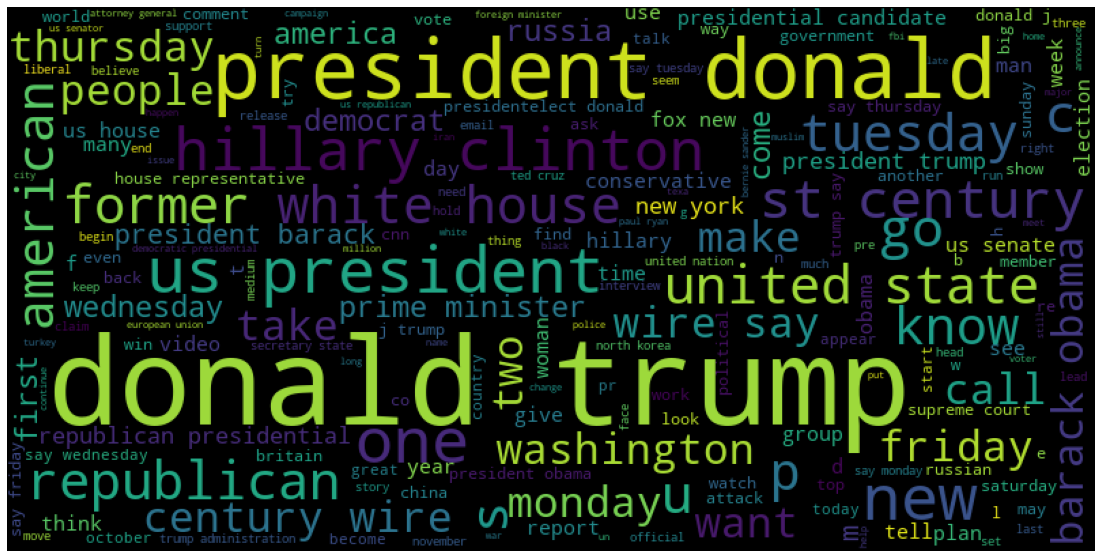

In [26]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.figure(figsize=(20,10))

#convert list to string and generate
text = WordCloud(width=800, height=400).generate(df['text_tokenized_string'].to_string())
plt.imshow(text)
plt.axis("off")
plt.show()

In [27]:
articles_concat = []

for text in df['text_tokenized']:
    articles_concat += text

articles_concat

['head',
 'conservative',
 'republican',
 'faction',
 'us',
 'congress',
 'vote',
 'month',
 'huge',
 'expansion',
 'national',
 'debt',
 'pay',
 'tax',
 'cut',
 'call',
 'fiscal',
 'conservative',
 'sunday',
 'urge',
 'budget',
 'restraint',
 'keep',
 'sharp',
 'pivot',
 'way',
 'among',
 'republicans',
 'us',
 'representative',
 'mark',
 'meadows',
 'speak',
 'cbs',
 'face',
 'nation',
 'draw',
 'hard',
 'line',
 'federal',
 'spending',
 'lawmaker',
 'brace',
 'battle',
 'january',
 'return',
 'holiday',
 'wednesday',
 'lawmaker',
 'begin',
 'try',
 'pass',
 'federal',
 'budget',
 'fight',
 'likely',
 'link',
 'issue',
 'immigration',
 'policy',
 'even',
 'november',
 'congressional',
 'election',
 'campaign',
 'approach',
 'republicans',
 'seek',
 'keep',
 'control',
 'congress',
 'president',
 'donald',
 'trump',
 'republicans',
 'want',
 'big',
 'budget',
 'increase',
 'military',
 'spending',
 'democrats',
 'also',
 'want',
 'proportional',
 'increase',
 'nondefense',
 'discretio

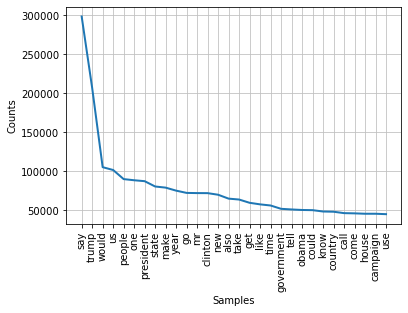

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [28]:
articles_freqdist = FreqDist(articles_concat)
articles_freqdist.plot(30,cumulative=False)

In [29]:
display(articles_freqdist.most_common(200))

[('say', 298350),
 ('trump', 206782),
 ('would', 105151),
 ('us', 101496),
 ('people', 89840),
 ('one', 88365),
 ('president', 87176),
 ('state', 80364),
 ('make', 78903),
 ('year', 75040),
 ('go', 72136),
 ('mr', 71900),
 ('clinton', 71840),
 ('new', 69786),
 ('also', 64795),
 ('take', 63635),
 ('get', 59458),
 ('like', 57446),
 ('time', 55994),
 ('government', 51738),
 ('tell', 50910),
 ('obama', 50249),
 ('could', 50017),
 ('know', 48290),
 ('country', 48008),
 ('call', 46197),
 ('come', 45909),
 ('house', 45410),
 ('campaign', 45409),
 ('use', 44875),
 ('election', 43706),
 ('even', 43454),
 ('work', 42712),
 ('two', 42271),
 ('donald', 41999),
 ('united', 41694),
 ('many', 41473),
 ('first', 41172),
 ('last', 40750),
 ('see', 40650),
 ('party', 40119),
 ('want', 40054),
 ('report', 39833),
 ('day', 39419),
 ('white', 39301),
 ('think', 39283),
 ('news', 39283),
 ('include', 38428),
 ('hillary', 38244),
 ('vote', 38040),
 ('republican', 37806),
 ('right', 37569),
 ('official', 3580

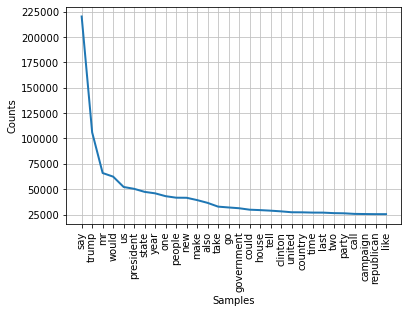

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [30]:
#frequency distribution for TRUE articles

articles_concat_true = []

for text in df[df['label']=='0']['text_tokenized']:
    articles_concat_true += text

articles_concat_true

articles_freqdist = FreqDist(articles_concat_true)
articles_freqdist.plot(30,cumulative=False)

In [31]:
display(articles_freqdist.most_common(200))

[('say', 220139),
 ('trump', 105913),
 ('mr', 65917),
 ('would', 62351),
 ('us', 52167),
 ('president', 50347),
 ('state', 47356),
 ('year', 45906),
 ('one', 43111),
 ('people', 41625),
 ('new', 41531),
 ('make', 39262),
 ('also', 36508),
 ('take', 32814),
 ('go', 31997),
 ('government', 31235),
 ('could', 29801),
 ('house', 29383),
 ('tell', 28836),
 ('clinton', 28160),
 ('united', 27273),
 ('country', 27200),
 ('time', 26943),
 ('last', 26907),
 ('two', 26422),
 ('party', 26239),
 ('call', 25657),
 ('campaign', 25518),
 ('republican', 25402),
 ('like', 25388),
 ('get', 24984),
 ('official', 24930),
 ('include', 24358),
 ('work', 23414),
 ('first', 22792),
 ('obama', 22679),
 ('states', 22567),
 ('come', 22055),
 ('election', 21834),
 ('group', 21385),
 ('many', 21252),
 ('use', 21092),
 ('week', 20958),
 ('day', 20930),
 ('percent', 20284),
 ('vote', 20045),
 ('white', 19809),
 ('want', 19741),
 ('know', 19535),
 ('report', 19486),
 ('former', 19322),
 ('law', 18624),
 ('see', 18473)

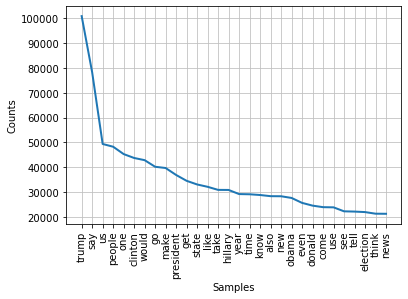

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [32]:
#frequency distribution for FAKE articles

articles_concat_true = []

for text in df[df['label']=='1']['text_tokenized']:
    articles_concat_true += text

articles_concat_true

articles_freqdist = FreqDist(articles_concat_true)
articles_freqdist.plot(30,cumulative=False)

In [33]:
display(articles_freqdist.most_common(200))

[('trump', 100869),
 ('say', 78211),
 ('us', 49329),
 ('people', 48215),
 ('one', 45254),
 ('clinton', 43680),
 ('would', 42800),
 ('go', 40139),
 ('make', 39641),
 ('president', 36829),
 ('get', 34474),
 ('state', 33008),
 ('like', 32058),
 ('take', 30821),
 ('hillary', 30795),
 ('year', 29134),
 ('time', 29051),
 ('know', 28755),
 ('also', 28287),
 ('new', 28255),
 ('obama', 27570),
 ('even', 25579),
 ('donald', 24474),
 ('come', 23854),
 ('use', 23783),
 ('see', 22177),
 ('tell', 22074),
 ('election', 21872),
 ('think', 21223),
 ('news', 21183),
 ('country', 20808),
 ('right', 20638),
 ('call', 20540),
 ('government', 20503),
 ('report', 20347),
 ('want', 20313),
 ('many', 20221),
 ('could', 20216),
 ('campaign', 19891),
 ('white', 19492),
 ('work', 19298),
 ('world', 19099),
 ('american', 18783),
 ('day', 18489),
 ('first', 18380),
 ('medium', 18215),
 ('vote', 17995),
 ('way', 17728),
 ('show', 17727),
 ('give', 17708),
 ('america', 17669),
 ('back', 16283),
 ('need', 16042),
 ('h

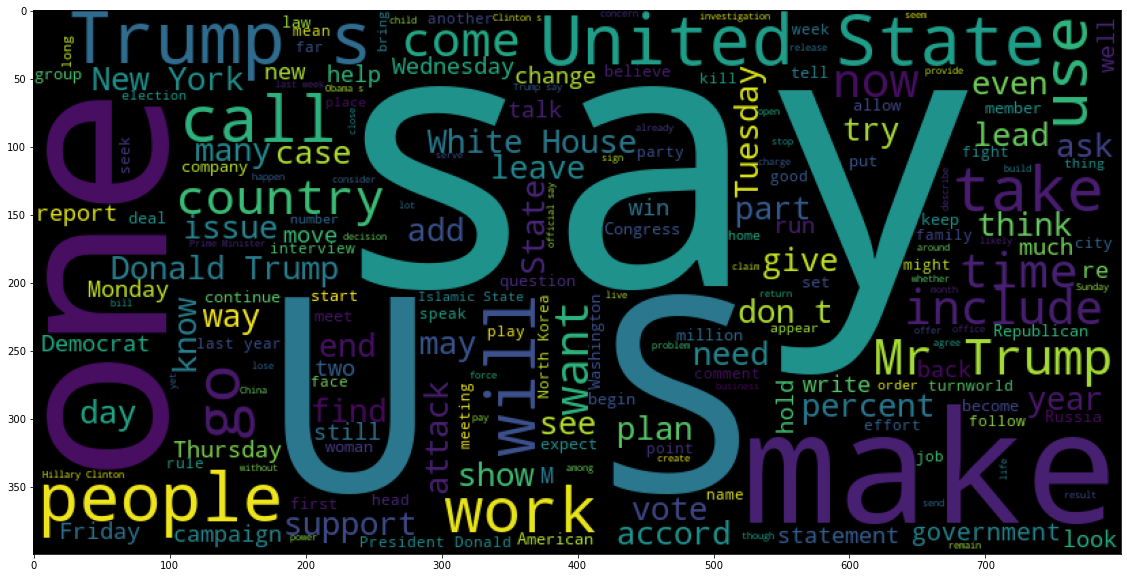

In [34]:
#word cloud for TRUE articles
plt.figure(figsize=(20,10))

words = ' '.join([Text for Text in df[df['label']=='0']['text_cleaned']])
wordCloud = WordCloud(mode="RGB", width=800 , height=400).generate(words)
plt.imshow(wordCloud)
plt.show()

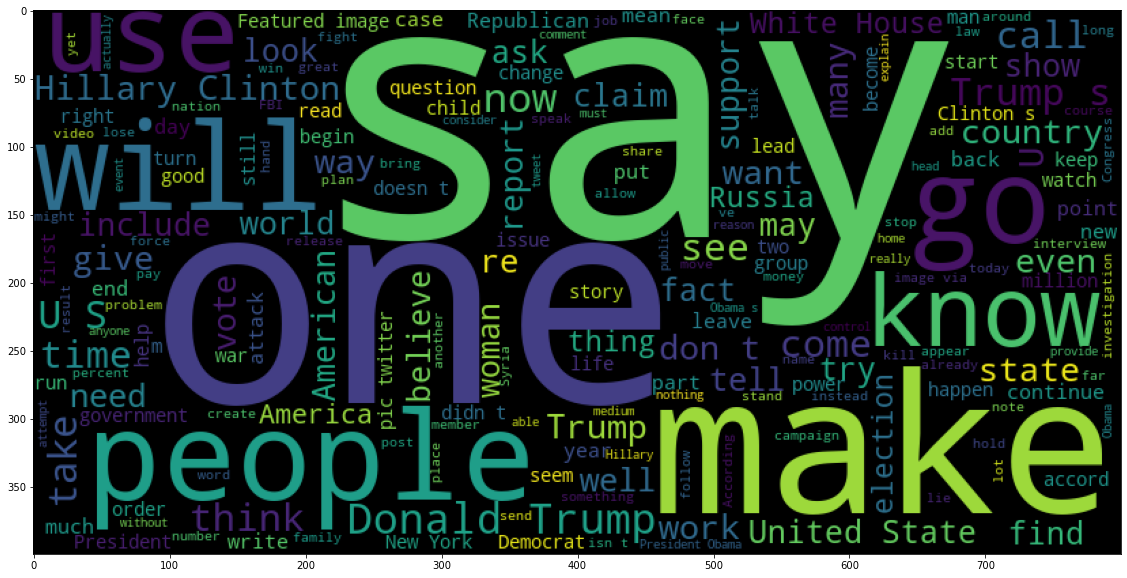

In [35]:
#word cloud for FAKE articles
plt.figure(figsize=(20,10))

words = ' '.join([Text for Text in df[df['label']=='1']['text_cleaned']])
wordCloud = WordCloud(mode="RGB", width=800 , height=400).generate(words)
plt.imshow(wordCloud)
plt.show()

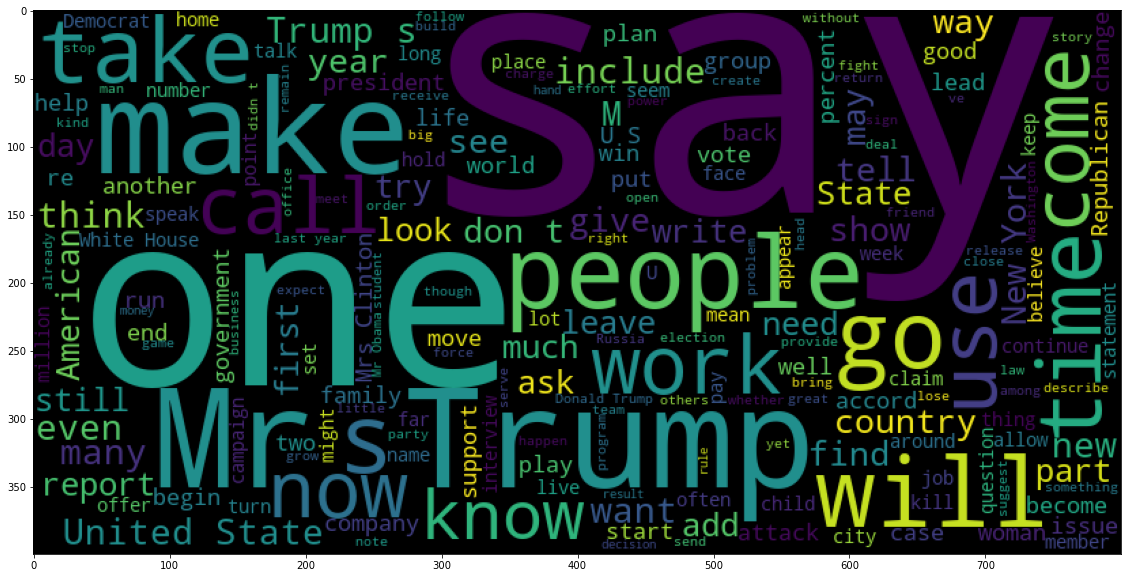

In [36]:
#word cloud for KAGGLE TRUE articles
plt.figure(figsize=(20,10))

words = ' '.join([Text for Text in df[(df['source']=='Kaggle') & (df['label']=='0')]['text_cleaned']])
wordCloud = WordCloud(mode="RGB", width=800 , height=400).generate(words)
plt.imshow(wordCloud)
plt.show()

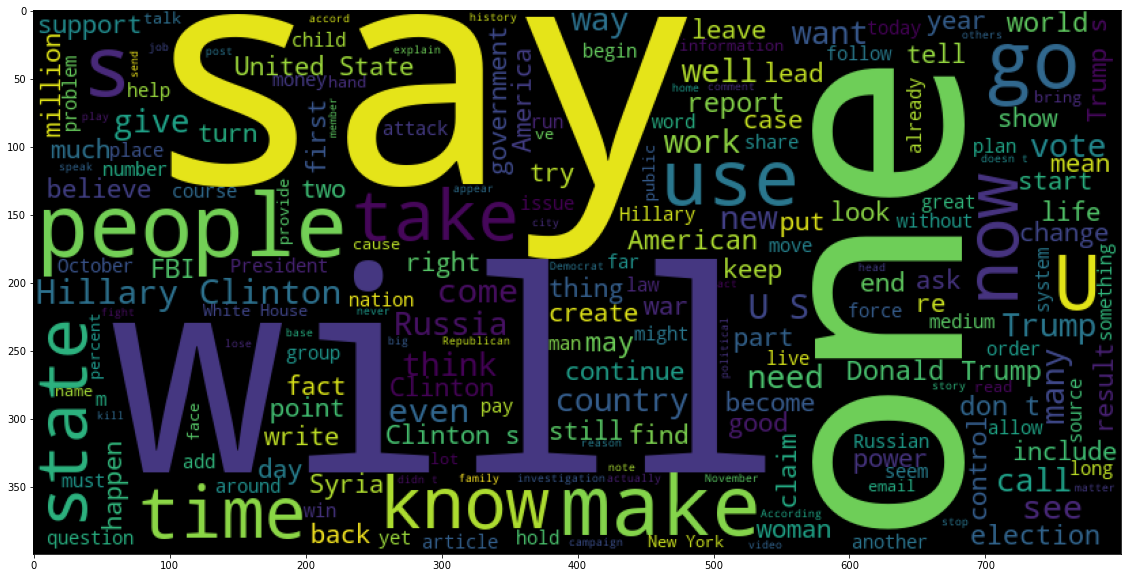

In [37]:
#word cloud for KAGGLE FALSE articles
plt.figure(figsize=(20,10))

words = ' '.join([Text for Text in df[(df['source']=='Kaggle') & (df['label']=='1')]['text_cleaned']])
wordCloud = WordCloud(mode="RGB", width=800 , height=400).generate(words)
plt.imshow(wordCloud)
plt.show()

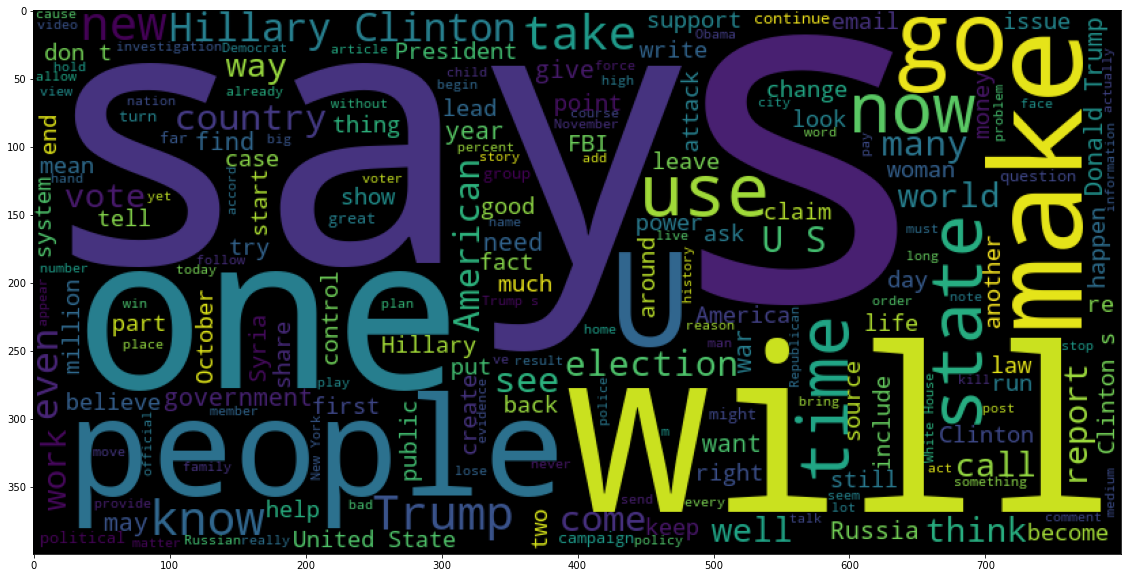

In [38]:
#word cloud for DataFlair FALSE articles
plt.figure(figsize=(20,10))

words = ' '.join([Text for Text in df[(df['source']=='DataFlair') & (df['label']=='1')]['text_cleaned']])
wordCloud = WordCloud(mode="RGB", width=800 , height=400).generate(words)
plt.imshow(wordCloud)
plt.show()

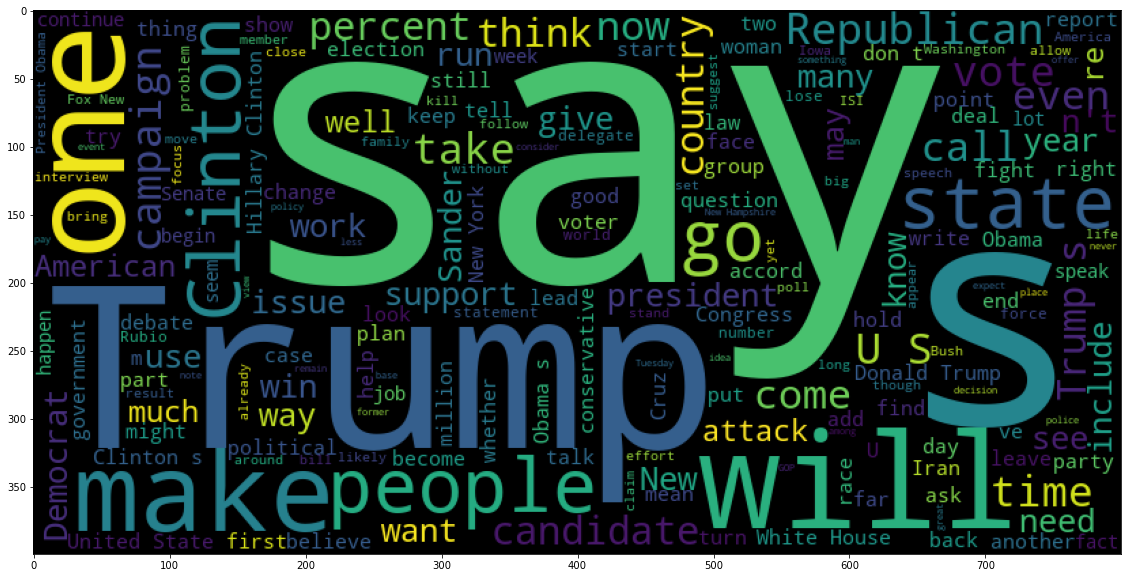

In [39]:
#word cloud for DataFlair TRUE articles
plt.figure(figsize=(20,10))

words = ' '.join([Text for Text in df[(df['source']=='DataFlair') & (df['label']=='0')]['text_cleaned']])
wordCloud = WordCloud(mode="RGB", width=800 , height=400).generate(words)
plt.imshow(wordCloud)
plt.show()

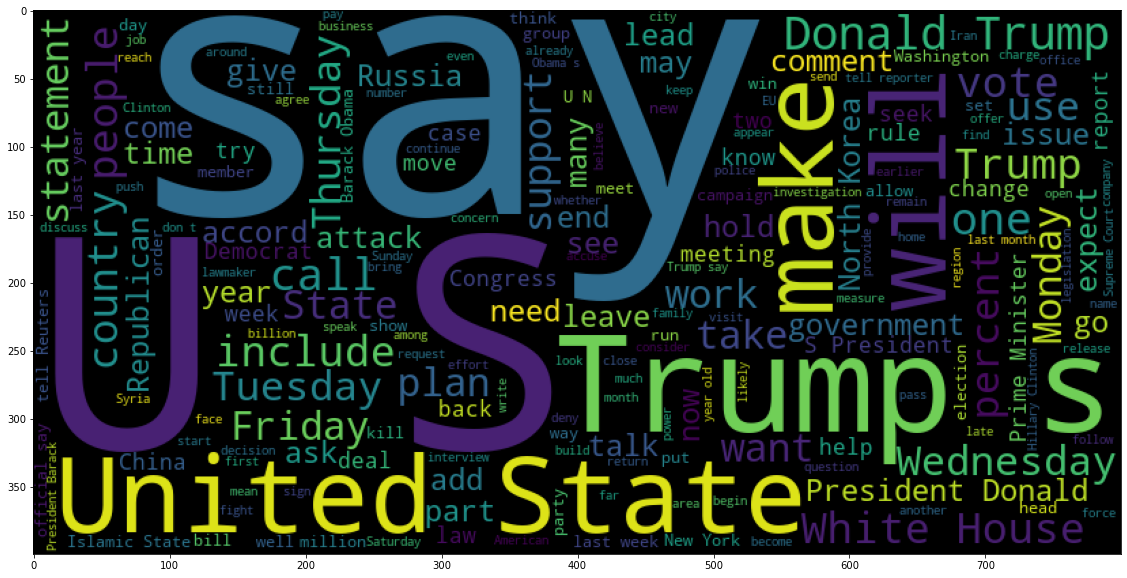

In [40]:
#word cloud for ISOT TRUE articles
plt.figure(figsize=(20,10))

words = ' '.join([Text for Text in df[(df['source']=='ISOT') & (df['label']=='0')]['text_cleaned']])
wordCloud = WordCloud(mode="RGB", width=800 , height=400).generate(words)
plt.imshow(wordCloud)
plt.show()

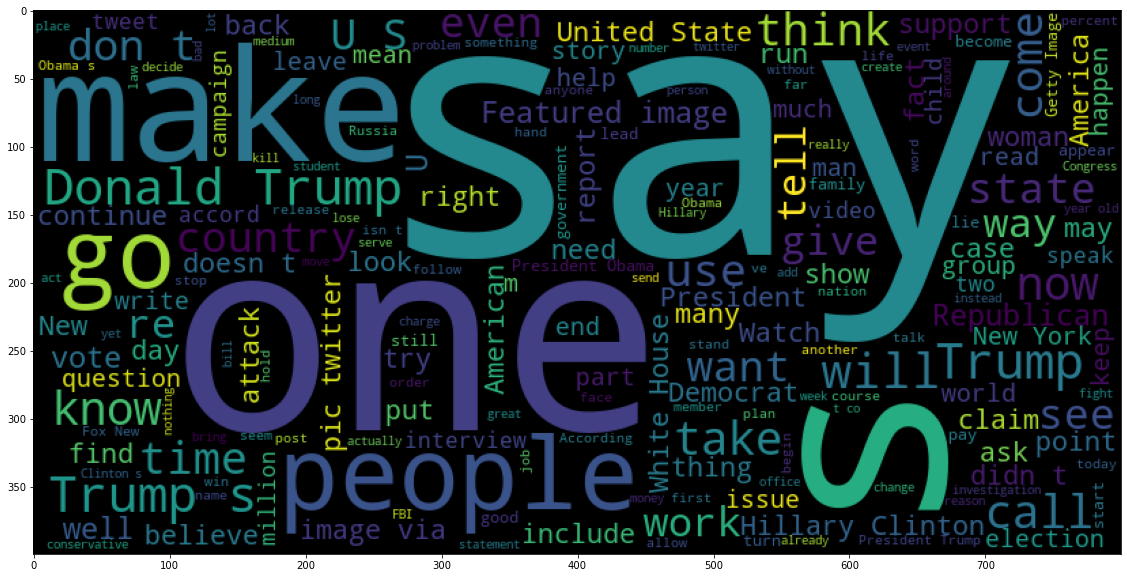

In [41]:
#word cloud for ISOT FALSE articles
plt.figure(figsize=(20,10))

words = ' '.join([Text for Text in df[(df['source']=='ISOT') & (df['label']=='1')]['text_cleaned']])
wordCloud = WordCloud(mode="RGB", width=800 , height=400).generate(words)
plt.imshow(wordCloud)
plt.show()

In [42]:
df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
72028  Rapper T.I.: Trump a ’Poster Child For White S...   
72029  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
72030  Macy’s Is Said to Receive Takeover Approach by...   
72031  NATO, Russia To Hold Parallel Exercises In Bal...   
72032                          What Keeps the F-35 Alive   

                                                    text label  source  \
0      WASHINGTON (Reuters) - The head of a conservat...     0    ISOT   
1      WASHINGTON (Reuters) - Transgender people will...     0    ISOT   
2      WASHINGTON (Reuters) - The special counsel inv...     0    ISOT   
3      WASHINGTON (Reuters) - Trump campaign adviser ...     0    ISOT   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...     0    ISOT   
...                                                  ...   ...     ...   
72028  Rapper T. I. unloaded on black celebrities who...     0  Kaggle   
72029  When the Green Bay Packers lost to the Washing...     0  Kaggle   
72030  The Macy’s of today grew from the union of sev...     0  Kaggle   
72031  NATO, Russia To Hold Parallel Exercises In Bal...     1  Kaggle   
72032    David Swanson is an author, activist, journa...     1  Kaggle   

                                            text_cleaned  \
0      The head of a conservative Republican faction ...   
1      Transgender people will be allow for the first...   
2      The special counsel investigation of link betw...   
3      Trump campaign adviser George Papadopoulos tel...   
4      President Donald Trump call on the U.S . Posta...   
...                                                  ...   
72028  Rapper T. I. unload on black celebrity who mee...   
72029  When the Green Bay Packers lose to the Washing...   
72030  The Macy ’ s of today grow from the union of s...   
72031  NATO , Russia To Hold Parallel Exercises In Ba...   
72032  David Swanson be an author , activist , journa...   

                                          text_tokenized  \
0      [head, conservative, republican, faction, us, ...   
1      [transgender, people, allow, first, time, enli...   
2      [special, counsel, investigation, link, russia...   
3      [trump, campaign, adviser, george, papadopoulo...   
4      [president, donald, trump, call, us, postal, s...   
...                                                  ...   
72028  [rapper, unload, black, celebrity, meet, donal...   
72029  [green, bay, packers, lose, washington, redski...   
72030  [macy, today, grow, union, several, great, nam...   
72031  [nato, russia, hold, parallel, exercises, balk...   
72032  [david, swanson, author, activist, journalist,...   

                                   text_tokenized_string  \
0      head conservative republican faction us congre...   
1      transgender people allow first time enlist us ...   
2      special counsel investigation link russia pres...   
3      trump campaign adviser george papadopoulos tel...   
4      president donald trump call us postal service ...   
...                                                  ...   
72028  rapper unload black celebrity meet donald trum...   
72029  green bay packers lose washington redskins wee...   
72030  macy today grow union several great name ameri...   
72031  nato russia hold parallel exercises balkans pr...   
72032  david swanson author activist journalist radio...   

                                         text_pos_tagged  
0      [(head, NN), (conservative, JJ), (republican, ...  
1      [(transgender, NN), (people, NNS), (allow, VBP...  
2      [(special, JJ), (counsel, NN), (investigation,...  
3      [(trump, NN), (campaign, NN), (advi

In [43]:
# average character length of data articles
df['text_cleaned'].str.len().mean()

3236.90366201915

In [44]:
# average character length of TRUE articles
true_lengths = df[df['label']=='0']['text_cleaned'].str.len()
true_lengths.mean()

3424.43070764832

In [45]:
# average character length of FAKE articles
false_lengths = df[df['label']=='1']['text_cleaned'].str.len()
false_lengths.mean()

3057.019445434848

In [46]:
#t-test

#null = there is no difference in article length between REAL and FAKE
#alternative = there is a difference in article length between REAL and FAKE

stats.ttest_ind(false_lengths.values, true_lengths.values)

#Reject null. There is a difference in article length between REAL and FAKE

Ttest_indResult(statistic=-13.293865326391415, pvalue=2.805715765128876e-40)

In [47]:
# average word length of data articles
df['text_tokenized'].str.len().mean()

303.17499580043676

In [48]:
# average word length of TRUE articles
true_lengths = df[df['label']=='0']['text_tokenized'].str.len()
true_lengths.mean()

323.7937383845604

In [49]:
# average word length of FAKE articles
false_lengths = df[df['label']=='1']['text_tokenized'].str.len()
false_lengths.mean()

283.39658813526785

In [50]:
#t-test

#null = there is no difference in word length between REAL and FAKE
#alternative = there is a difference in word length between REAL and FAKE

stats.ttest_ind(false_lengths.values, true_lengths.values)

#Reject null. There is a difference in word length between REAL and FAKE

Ttest_indResult(statistic=-15.706066379231466, pvalue=1.702779955680259e-55)

In [51]:
df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
72028  Rapper T.I.: Trump a ’Poster Child For White S...   
72029  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
72030  Macy’s Is Said to Receive Takeover Approach by...   
72031  NATO, Russia To Hold Parallel Exercises In Bal...   
72032                          What Keeps the F-35 Alive   

                                                    text label  source  \
0      WASHINGTON (Reuters) - The head of a conservat...     0    ISOT   
1      WASHINGTON (Reuters) - Transgender people will...     0    ISOT   
2      WASHINGTON (Reuters) - The special counsel inv...     0    ISOT   
3      WASHINGTON (Reuters) - Trump campaign adviser ...     0    ISOT   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...     0    ISOT   
...                                                  ...   ...     ...   
72028  Rapper T. I. unloaded on black celebrities who...     0  Kaggle   
72029  When the Green Bay Packers lost to the Washing...     0  Kaggle   
72030  The Macy’s of today grew from the union of sev...     0  Kaggle   
72031  NATO, Russia To Hold Parallel Exercises In Bal...     1  Kaggle   
72032    David Swanson is an author, activist, journa...     1  Kaggle   

                                            text_cleaned  \
0      The head of a conservative Republican faction ...   
1      Transgender people will be allow for the first...   
2      The special counsel investigation of link betw...   
3      Trump campaign adviser George Papadopoulos tel...   
4      President Donald Trump call on the U.S . Posta...   
...                                                  ...   
72028  Rapper T. I. unload on black celebrity who mee...   
72029  When the Green Bay Packers lose to the Washing...   
72030  The Macy ’ s of today grow from the union of s...   
72031  NATO , Russia To Hold Parallel Exercises In Ba...   
72032  David Swanson be an author , activist , journa...   

                                          text_tokenized  \
0      [head, conservative, republican, faction, us, ...   
1      [transgender, people, allow, first, time, enli...   
2      [special, counsel, investigation, link, russia...   
3      [trump, campaign, adviser, george, papadopoulo...   
4      [president, donald, trump, call, us, postal, s...   
...                                                  ...   
72028  [rapper, unload, black, celebrity, meet, donal...   
72029  [green, bay, packers, lose, washington, redski...   
72030  [macy, today, grow, union, several, great, nam...   
72031  [nato, russia, hold, parallel, exercises, balk...   
72032  [david, swanson, author, activist, journalist,...   

                                   text_tokenized_string  \
0      head conservative republican faction us congre...   
1      transgender people allow first time enlist us ...   
2      special counsel investigation link russia pres...   
3      trump campaign adviser george papadopoulos tel...   
4      president donald trump call us postal service ...   
...                                                  ...   
72028  rapper unload black celebrity meet donald trum...   
72029  green bay packers lose washington redskins wee...   
72030  macy today grow union several great name ameri...   
72031  nato russia hold parallel exercises balkans pr...   
72032  david swanson author activist journalist radio...   

                                         text_pos_tagged  
0      [(head, NN), (conservative, JJ), (republican, ...  
1      [(transgender, NN), (people, NNS), (allow, VBP...  
2      [(special, JJ), (counsel, NN), (investigation,...  
3      [(trump, NN), (campaign, NN), (advi

# Modeling

## Managing class imbalance

In [52]:
label_counts = df['label'].value_counts()
label_counts

1    36461
0    34975
Name: label, dtype: int64

In [53]:
X = df[['text', 'text_tokenized_string', 'title', 'label']]
y = df['label']

In [54]:
from imblearn.datasets import make_imbalance

ratio=4
x_imb, y_imb = make_imbalance(X, y, sampling_strategy={'1': label_counts.max() // ratio}, random_state=7)

In [55]:
y_imb.value_counts()

0    34975
1     9115
Name: label, dtype: int64

In [56]:
X_train, X_test, y_train, y_test = train_test_split(x_imb, y_imb, stratify=y_imb, random_state=7)

In [113]:
df_value_counts = pd.DataFrame(y_train.value_counts())
df_value_counts

label
0  26231
1   6836

In [58]:
y_train.value_counts()

0    26231
1     6836
Name: label, dtype: int64

## Vectorizing - `text`

In [59]:
#vectorize our text so that our model can interpret
vectorizer = TfidfVectorizer()

tf_idf_train = vectorizer.fit_transform(X_train['text'])
tf_idf_train.shape

tf_idf_test = vectorizer.transform(X_test['text'])

## Model Evaluation Tracking

In [115]:
#let's track the various models performance in a dataframe
df_model_results = pd.DataFrame(columns=['Model Type', 'Modeled On', 'CV Score', 'False Negative Rate','True Positive Rate', 
                                         'False Positive Rate', 'True Negative Rate', 'Precision', 'Recall', 'F1 Score'])
df_model_results

Empty DataFrame
Columns: [Model Type, Modeled On, CV Score, False Negative Rate, True Positive Rate, False Positive Rate, True Negative Rate, Precision, Recall, F1 Score]
Index: []

In [114]:
def evaluate_store_results(pipeline, variable, model_name):
    global df_model_results
    
    cv_results = np.median(cross_val_score(pipeline, X_train[variable], y_train, cv=5))
    y_pred = cross_val_predict(pipeline, X_train[variable], y_train, cv=5)
    
    #confusion matrix
    c_matrix = confusion_matrix(y_train, y_pred)
    
    #Accuracy - overall, how often is the classifer correct?
    accuracy = (c_matrix[0,0] + c_matrix[1,1])  / sum(y_train.value_counts())

    #Misclassification Rate - overall, how often is the model wrong?
    misclass_rate = 1-accuracy

    #False Negative Rate - when a news article is FAKE, how often does the model predict this to be REAl?
    FNR = c_matrix[1,0] / df_value_counts.iloc[1]['label']

    #True Positive Rate - when a news article is FAKE, how often does the model correctly predict this?
    TPR = c_matrix[1,1] / df_value_counts.iloc[1]['label']

    #False Positive Rate - when a news article is REAL, how often does the model predict it to be FAKE? - WANT TO LOWER THIS A BIT?
    FPR = c_matrix[0,1] / df_value_counts.iloc[0]['label']

    #True Negative Rate - when a news article is REAL, how often does the model predict it to be REAL? - WANT TO INCREASE THIS A BIT?
    TNR = c_matrix[0,0] / df_value_counts.iloc[0]['label']

    #Precision - What proportion of FAKE predictions were actually correct?
    precision = c_matrix[1,1] / (c_matrix[0,1] + c_matrix[1,1])

    #Recall - what proportion of actual FAKE articles were identified?
    recall = c_matrix[1,1] / (c_matrix[1,0] + c_matrix[1,1])

    #F1 score
    f1 = 2*(precision*recall)/(precision+recall)
    
    model_results = {
    'Model Type': model_name,
    'Modeled On': variable, 
    'CV Score': cv_results,
    'False Negative Rate': FNR,
    'True Positive Rate': TPR,
    'False Positive Rate': FPR,
    'True Negative Rate': TNR,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1}

    df_model_results = df_model_results.append(model_results, ignore_index=True)
    return df_model_results

## Baseline Model - `text`

In [105]:
# baseline_model = DummyClassifier(strategy="most_frequent")

pipeline_base = Pipeline([('Vectorizer', TfidfVectorizer()),
              ('Dummy Classifier', DummyClassifier(strategy='most_frequent'))])


# baseline_model.fit(tf_idf_train, y_train)

# y_pred = baseline_model.predict(tf_idf_test)

In [106]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(pipeline_base, X_train['text'], y_train, cv=5)
c_matrix = confusion_matrix(y_train, y_pred)

In [116]:
evaluate_store_results(pipeline_base, 'text', 'Baseline Model')

<ipython-input-114-32044a0743e3>:29: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = c_matrix[1,1] / (c_matrix[0,1] + c_matrix[1,1])


Model Type Modeled On  CV Score  False Negative Rate  \
0  Baseline Model       text  0.793286                  1.0   

   True Positive Rate  False Positive Rate  True Negative Rate  Precision  \
0                 0.0                  0.0                 1.0        NaN   

   Recall  F1 Score  
0     0.0       NaN

## Multinomial Naive Bayes - `text`

In [117]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

pipeline_MNB = Pipeline([('Vectorizer', TfidfVectorizer()),
              ('Multinomial Naive Bayes', MultinomialNB())])

In [118]:
evaluate_store_results(pipeline_MNB, 'text', 'Multinomial Naive Bayes')

Model Type Modeled On  CV Score  False Negative Rate  \
0           Baseline Model       text  0.793286             1.000000   
1  Multinomial Naive Bayes       text  0.799637             0.969573   

   True Positive Rate  False Positive Rate  True Negative Rate  Precision  \
0            0.000000                  0.0                 1.0        NaN   
1            0.030427                  0.0                 1.0        1.0   

     Recall  F1 Score  
0  0.000000       NaN  
1  0.030427  0.059057

## Random Forest Classifier - `text`

In [120]:
from sklearn.ensemble import RandomForestClassifier

pipeline_RFC = Pipeline([('Vectorizer', TfidfVectorizer()),
              ('Random Forest Classifier', RandomForestClassifier(n_estimators=100))])

In [121]:
evaluate_store_results(pipeline_RFC, 'text', 'Random Forest Classifier')

Model Type Modeled On  CV Score  False Negative Rate  \
0            Baseline Model       text  0.793286             1.000000   
1   Multinomial Naive Bayes       text  0.799637             0.969573   
2  Random Forest Classifier       text  0.896719             0.494880   

   True Positive Rate  False Positive Rate  True Negative Rate  Precision  \
0            0.000000             0.000000            1.000000        NaN   
1            0.030427             0.000000            1.000000   1.000000   
2            0.505120             0.002364            0.997636   0.982361   

     Recall  F1 Score  
0  0.000000       NaN  
1  0.030427  0.059057  
2  0.505120  0.667182

## Passive Aggressive Classifier `text`

In [122]:
from sklearn.linear_model import PassiveAggressiveClassifier
#Passive Aggressive algorithms are online learning algorithms. 
#Such an algorithm remains passive for a correct classification outcome, and turns aggressive in the event of a miscalculation, 
#updating and adjusting.

pipeline_PAC = Pipeline([('Vectorizer', TfidfVectorizer()),
              ('Passive Aggressive Classifier', PassiveAggressiveClassifier(max_iter=50))])

In [123]:
evaluate_store_results(pipeline_PAC, 'text', 'Passive Aggressive Classifier')

Model Type Modeled On  CV Score  False Negative Rate  \
0                 Baseline Model       text  0.793286             1.000000   
1        Multinomial Naive Bayes       text  0.799637             0.969573   
2       Random Forest Classifier       text  0.896719             0.494880   
3  Passive Aggressive Classifier       text  0.960236             0.119368   

   True Positive Rate  False Positive Rate  True Negative Rate  Precision  \
0            0.000000             0.000000            1.000000        NaN   
1            0.030427             0.000000            1.000000   1.000000   
2            0.505120             0.002364            0.997636   0.982361   
3            0.880632             0.019290            0.980710   0.922464   

     Recall  F1 Score  
0  0.000000       NaN  
1  0.030427  0.059057  
2  0.505120  0.667182  
3  0.880632  0.901063

# Modeling - `text_tokenized_string`

## Multinomial Naive Bayes - `text_tokenized_string`

In [127]:
evaluate_store_results(pipeline_MNB, 'text_tokenized_string', 'Multinomial Naive Bayes')
evaluate_store_results(pipeline_RFC, 'text_tokenized_string', 'Random Forest Classifier')
evaluate_store_results(pipeline_PAC, 'text_tokenized_string', 'Passive Aggressive Classifier')

Model Type             Modeled On  CV Score  \
0                 Baseline Model                   text  0.793286   
1        Multinomial Naive Bayes                   text  0.799637   
2       Random Forest Classifier                   text  0.896719   
3  Passive Aggressive Classifier                   text  0.960236   
4        Multinomial Naive Bayes  text_tokenized_string  0.886436   
5       Random Forest Classifier  text_tokenized_string  0.885831   
6  Passive Aggressive Classifier  text_tokenized_string  0.950854   

   False Negative Rate  True Positive Rate  False Positive Rate  \
0             1.000000            0.000000             0.000000   
1             0.969573            0.030427             0.000000   
2             0.494880            0.505120             0.002364   
3             0.119368            0.880632             0.019290   
4             0.535693            0.464307             0.001639   
5             0.545056            0.454944             0.001906   
6             0.144529            0.855471             0.024208   

   True Negative Rate  Precision    Recall  F1 Score  
0            1.000000        NaN  0.000000       NaN  
1            1.000000   1.000000  0.030427  0.059057  
2            0.997636   0.982361  0.505120  0.667182  
3            0.980710   0.922464  0.880632  0.901063  
4            0.998361   0.986634  0.464307  0.631453  
5            0.998094   0.984177  0.454944  0.622249  
6            0.975792   0.902052  0.855471  0.878144

In [128]:
evaluate_store_results(pipeline_MNB, 'title', 'Multinomial Naive Bayes')
evaluate_store_results(pipeline_RFC, 'title', 'Random Forest Classifier')
evaluate_store_results(pipeline_PAC, 'title', 'Passive Aggressive Classifier')

Model Type             Modeled On  CV Score  \
0                 Baseline Model                   text  0.793286   
1        Multinomial Naive Bayes                   text  0.799637   
2       Random Forest Classifier                   text  0.896719   
3  Passive Aggressive Classifier                   text  0.960236   
4        Multinomial Naive Bayes  text_tokenized_string  0.886436   
5       Random Forest Classifier  text_tokenized_string  0.885831   
6  Passive Aggressive Classifier  text_tokenized_string  0.950854   
7        Multinomial Naive Bayes                  title  0.900968   
8       Random Forest Classifier                  title  0.898080   
9  Passive Aggressive Classifier                  title  0.895978   

   False Negative Rate  True Positive Rate  False Positive Rate  \
0             1.000000            0.000000             0.000000   
1             0.969573            0.030427             0.000000   
2             0.494880            0.505120             0.002364   
3             0.119368            0.880632             0.019290   
4             0.535693            0.464307             0.001639   
5             0.545056            0.454944             0.001906   
6             0.144529            0.855471             0.024208   
7             0.426419            0.573581             0.012886   
8             0.426712            0.573288             0.013038   
9             0.261264            0.738736             0.059586   

   True Negative Rate  Precision    Recall  F1 Score  
0            1.000000        NaN  0.000000       NaN  
1            1.000000   1.000000  0.030427  0.059057  
2            0.997636   0.982361  0.505120  0.667182  
3            0.980710   0.922464  0.880632  0.901063  
4            0.998361   0.986634  0.464307  0.631453  
5            0.998094   0.984177  0.454944  0.622249  
6            0.975792   0.902052  0.855471  0.878144  
7            0.987114   0.920639  0.573581  0.706805  
8            0.986962   0.919737  0.573288  0.706317  
9            0.940414   0.763647  0.738736  0.750985

In [ ]:
#vectorize our text so that our model can interpret
vectorizer = TfidfVectorizer()

tf_idf_train = vectorizer.fit_transform(X_train['title'])
tf_idf_train.shape

tf_idf_test = vectorizer.transform(X_test['title'])

## Multinomial Naive Bayes - `text`

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

nb_classifier = MultinomialNB()
nb_classifier.fit(tf_idf_train, y_train)
nb_train_preds = nb_classifier.predict(tf_idf_train)
nb_test_preds = nb_classifier.predict(tf_idf_test)
nb_train_score = accuracy_score(y_train, nb_train_preds)
nb_test_score = accuracy_score(y_test, nb_test_preds)

In [ ]:
evaluate_store_results_test(nb_classifier,'title', 'Multinomial Naive Bayes')

## Random Forest Classifier - `text`

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(tf_idf_train, y_train)
rf_train_preds = rf_classifier.predict(tf_idf_train)
rf_test_preds = rf_classifier.predict(tf_idf_test)
rf_train_score = accuracy_score(y_train, rf_train_preds)
rf_test_score = accuracy_score(y_test, rf_test_preds)

In [ ]:
evaluate_store_results_test(rf_classifier,'title', 'Random Forest Classifier')

## Passive Aggressive Classifier `text`

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
#Passive Aggressive algorithms are online learning algorithms. 
#Such an algorithm remains passive for a correct classification outcome, and turns aggressive in the event of a miscalculation, 
#updating and adjusting.

pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tf_idf_train,y_train)

pac_train_preds = pac.predict(tf_idf_train)
pac_train_score = accuracy_score(y_train, pac_train_preds)

In [ ]:
evaluate_store_results_test(pac,'title', 'Passive Aggressive Classifier')

https://www.vox.com/policy-and-politics/2020/12/22/22195488/fake-news-social-media-2020
    
In 2019, 8 percent of engagement with the 100 top-performing news sources on social media was dubious. In 2020, that number more than doubled to 17 percent.